# Workshop #7. Batch-correction and label transfer

# Hometask

## Task 1

Try to integrate the dataset from the workshop with following techniques:
1. scanorama,
2. BBKNN,
3. scVI,
4. combat.

Which method works better, which — worse? Please motivate your answer.

2024-07-14 20:33:01,762 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-07-14 20:33:07,562 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-07-14 20:33:07,693 - harmonypy - INFO - Iteration 1 of 30
INFO:harmonypy:Iteration 1 of 30
2024-07-14 20:33:17,488 - harmonypy - INFO - Iteration 2 of 30
INFO:harmonypy:Iteration 2 of 30
2024-07-14 20:33:24,148 - harmonypy - INFO - Iteration 3 of 30
INFO:harmonypy:Iteration 3 of 30
2024-07-14 20:33:31,867 - harmonypy - INFO - Iteration 4 of 30
INFO:harmonypy:Iteration 4 of 30
2024-07-14 20:33:38,538 - harmonypy - INFO - Iteration 5 of 30
INFO:harmonypy:Iteration 5 of 30
2024-07-14 20:33:46,130 - harmonypy - INFO - Iteration 6 of 30
INFO:harmonypy:Iteration 6 of 30
2024-07-14 20:33:47,899 - harmonypy - INFO - Iteration 7 of 30
INFO:harmonypy:Iteration 7 of 30
2024-07-14 20:33:49,706 - 

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:15)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)


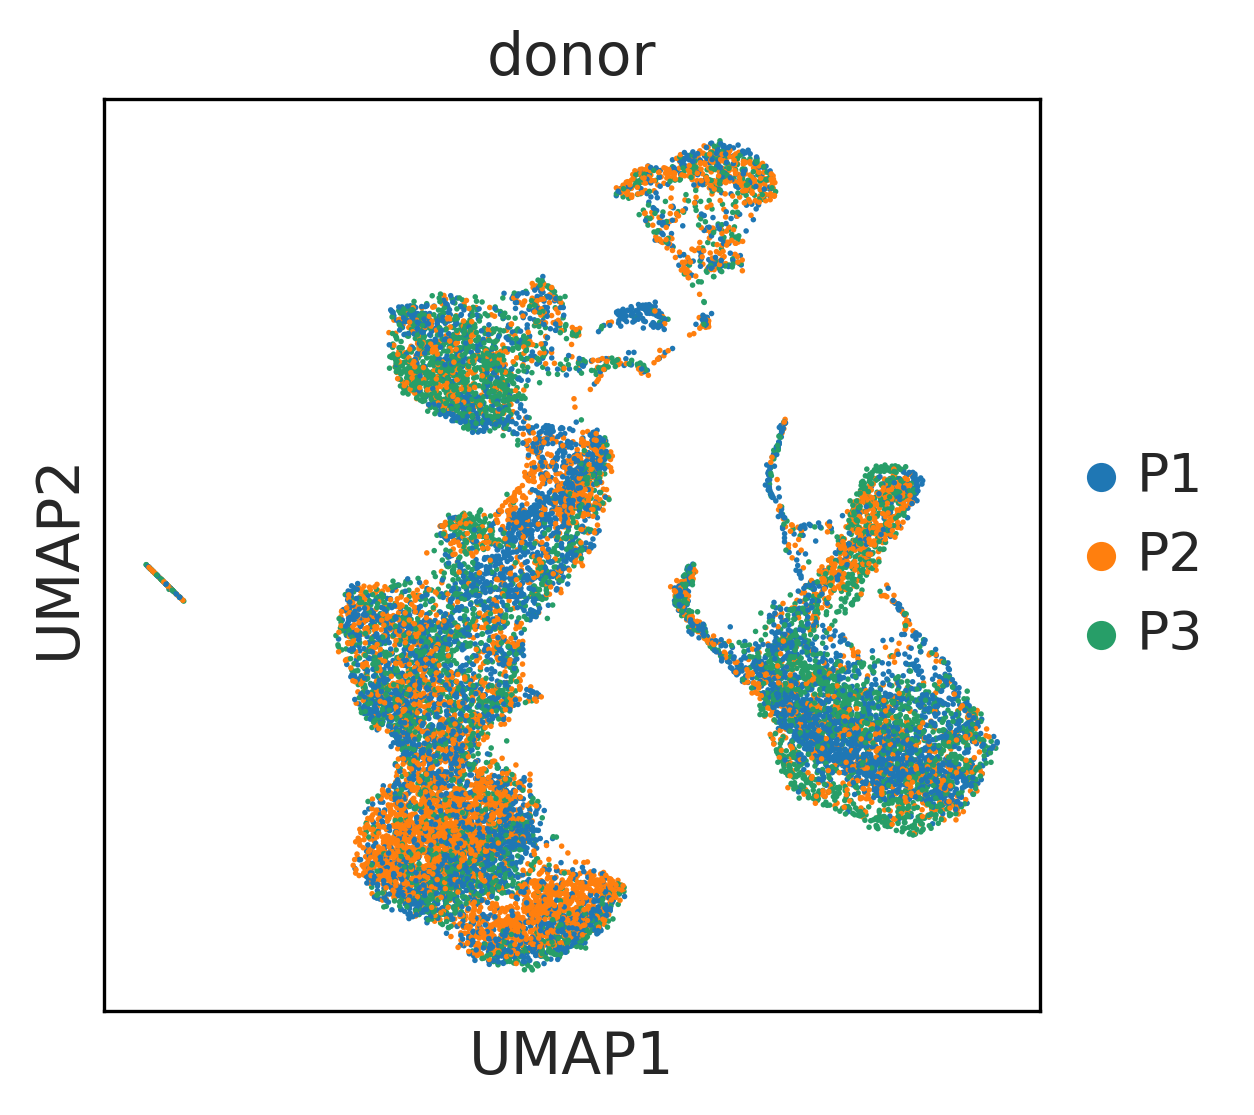

In [62]:
# Для сравнения
adata_harmony = adata.copy()
sce.pp.harmony_integrate(adata_harmony, key="donor", max_iter_harmony=30)
sc.pp.neighbors(adata_harmony, use_rep="X_pca_harmony")
sc.tl.leiden(adata_harmony)
sc.tl.umap(adata_harmony)
sc.pl.umap(adata_harmony, color="donor")

#### scanorama

In [ ]:
!pip install scanorama

In [66]:
adata.obs_names = adata.obs_names + ":" + adata.obs.donor.astype(str)

In [ ]:
adata_scanorama = adata.copy()
sc.external.pp.scanorama_integrate(adata_scanorama, key="donor") # ValueError: Detected non-contiguous batches.

In [70]:
# from https://github.com/brianhie/scanorama/discussions/131
idx = adata_scanorama.obs.sort_values("donor").index
adata_scanorama = adata_scanorama[idx,]

In [72]:
sc.external.pp.scanorama_integrate(adata_scanorama, key="donor")

[[0.         0.69180122 0.22480013]
 [0.         0.         0.82179624]
 [0.         0.         0.        ]]
Processing datasets P2 <=> P3
Processing datasets P1 <=> P2
Processing datasets P1 <=> P3


/usr/local/lib/python3.10/dist-packages/scanpy/external/pp/_scanorama_integrate.py:148: ImplicitModificationWarning: Setting element `.obsm['X_scanorama']` of view, initializing view as actual.
  adata.obsm[adjusted_basis] = np.concatenate(integrated)


computing neighbors


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
running Leiden clustering
    finished: found 53 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:09)
computing UMAP


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:24)


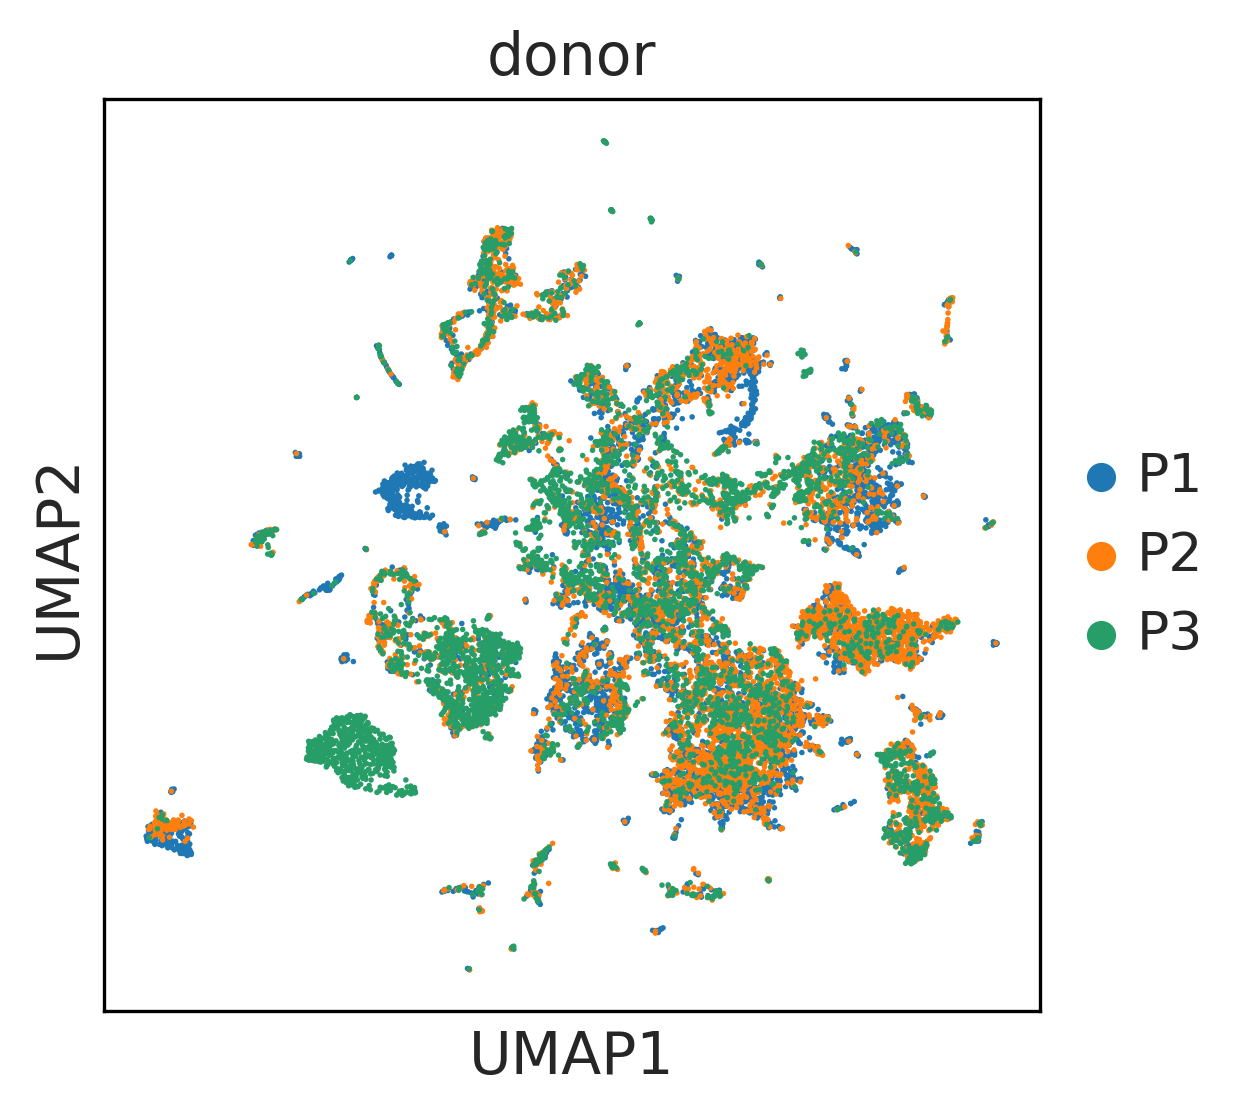

In [75]:
# adata_scanorama
sc.pp.neighbors(adata_scanorama, use_rep="X_scanorama")
sc.tl.leiden(adata_scanorama)
sc.tl.umap(adata_scanorama)
sc.pl.umap(adata_scanorama, color="donor")

Батчи перемешались, но картинка крайне странная

#### BBKNN

In [ ]:
! pip install bbknn

In [79]:
adata_bbknn = adata.copy()
sc.external.pp.bbknn(adata_bbknn, batch_key="donor")

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:07)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)


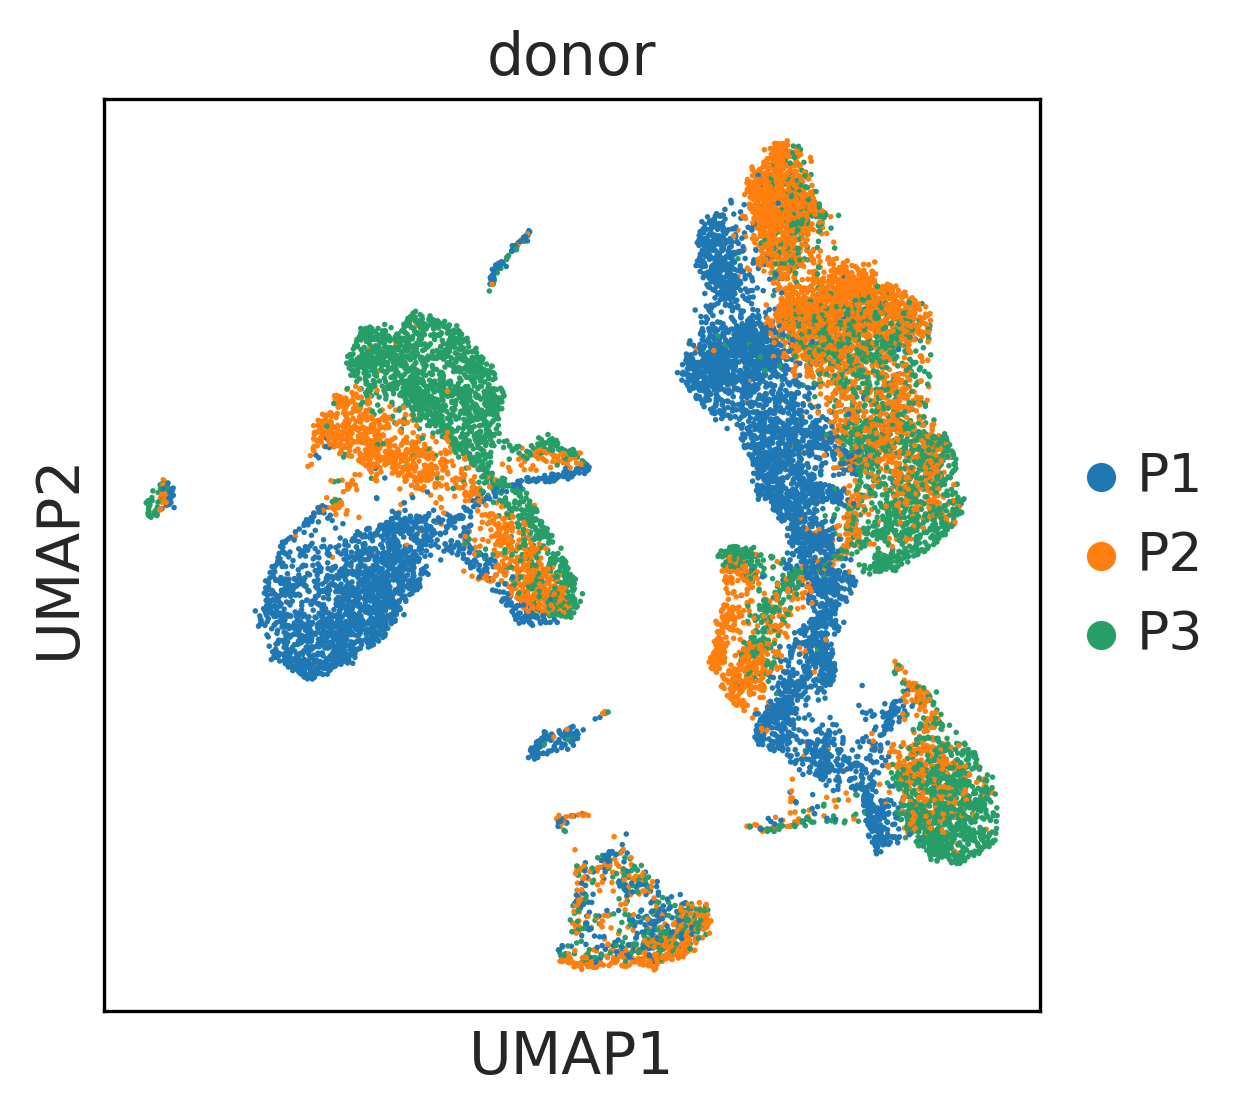

In [84]:
# adata_bbknn
sc.pp.neighbors(adata_bbknn)
sc.tl.leiden(adata_bbknn)
sc.tl.umap(adata_bbknn)
sc.pl.umap(adata_bbknn, color="donor")

Батчи не перемешаны – я, видимо, не понял, как использовать тул (хотя шел по туториалу https://scanpy-tutorials.readthedocs.io/en/latest/integrating-data-using-ingest.html)

#### scVI

In [31]:
# не успел

#### combat

In [87]:
adata_combat = adata.copy()
sc.pp.combat(adata_combat, key="donor")

Standardizing Data across genes.

Found 3 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments



/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_combat.py:351: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


Adjusting data



computing PCA
    with n_comps=30
    finished (0:00:14)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


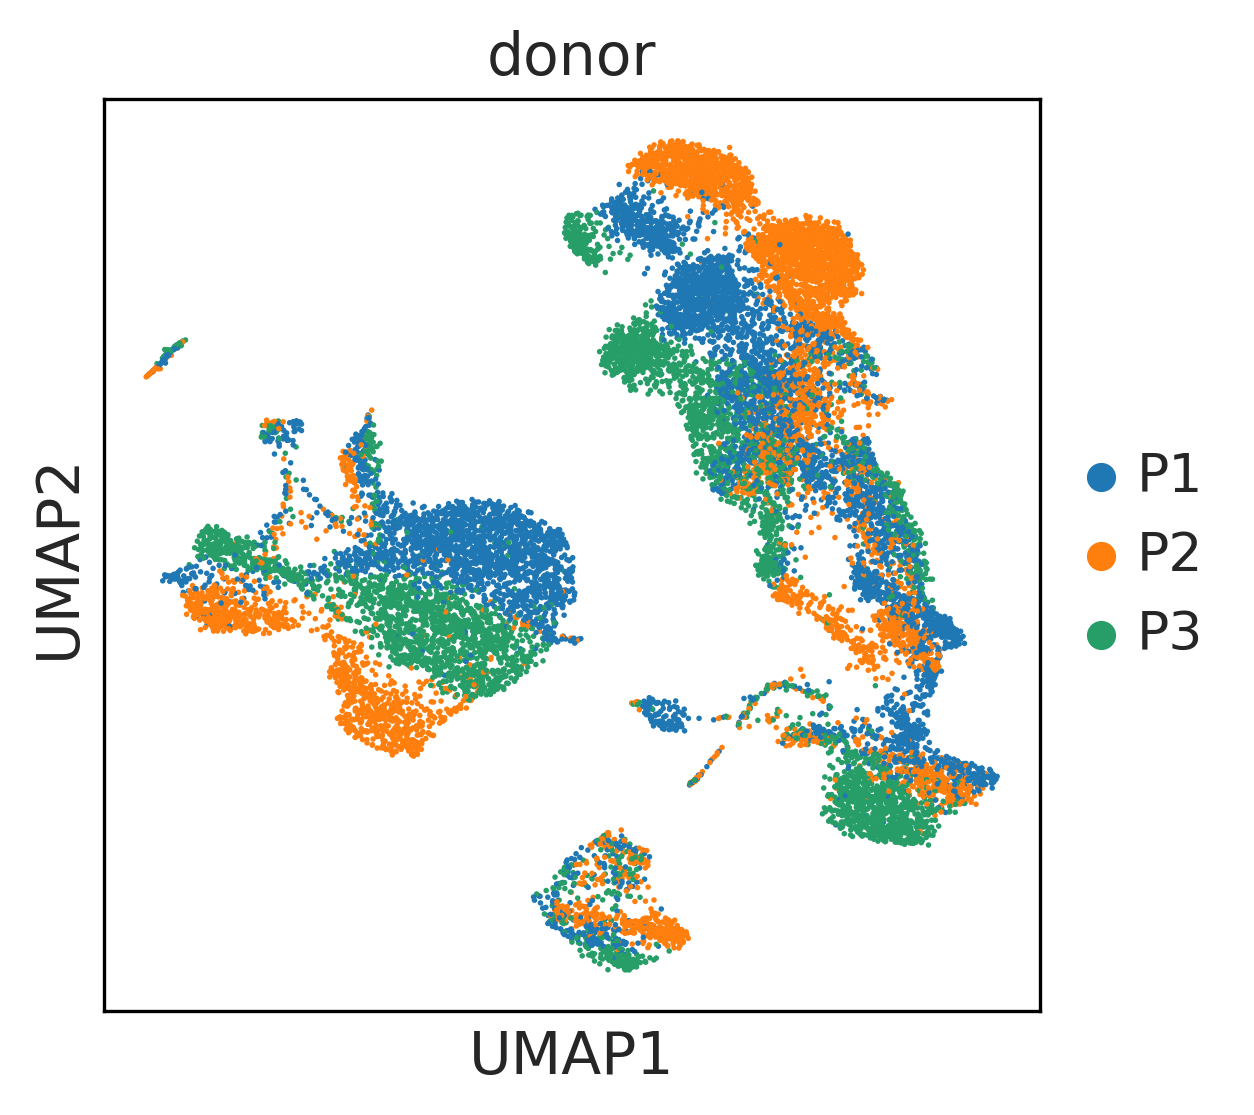

In [90]:
# from https://nbisweden.github.io/workshop-archive/workshop-scRNAseq/2020-01-27/labs/compiled/scanpy/scanpy_03_integration.html
# adata_combat
sc.pp.pca(adata_combat, n_comps=30)
sc.pp.neighbors(adata_combat, n_pcs =30)
sc.tl.leiden(adata_combat)
sc.tl.umap(adata_combat)
sc.pl.umap(adata_combat, color="donor")

Батчи очень плохо перемешаны

Судя по графикам, лучший тул – symphony

## Task 2

Using [Cellxgene Portal](https://cellxgene.cziscience.com/) choose the dataset of your scientific interest (keep only 5-6 batches) and try to reproduce the clustering with corresponding cell types. Does it agree with provided cell type annotation?

In [ ]:
!pip install hdf5plugin

In [20]:
import scanpy as sc
import seaborn as sns

In [35]:
# Взял небольшой датасет по крови – Tabula Sapiens - Blood
! wget -O data.h5ad https://datasets.cellxgene.cziscience.com/c18b60ea-7dbc-4705-a3dc-e29da4e43c68.h5ad

--2024-07-14 18:27:55--  https://datasets.cellxgene.cziscience.com/c18b60ea-7dbc-4705-a3dc-e29da4e43c68.h5ad
Resolving datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)... 13.226.210.67, 13.226.210.22, 13.226.210.38, ...
Connecting to datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)|13.226.210.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 792367732 (756M) [binary/octet-stream]
Saving to: ‘data.h5ad’

data.h5ad           100%[===================>] 755.66M  42.0MB/s    in 23s     

2024-07-14 18:28:18 (33.5 MB/s) - ‘data.h5ad’ saved [792367732/792367732]



In [15]:
adata = sc.read_h5ad("data.h5ad")

In [40]:
adata.obs["donor_id"].value_counts()
# В датасете и так всего шесть батчей, но я возьму пять – убрал TSP7, так как его больше всего :)

donor_id
TSP7     17831
TSP2     11402
TSP14     9962
TSP10     5007
TSP1      3939
TSP8      1974
Name: count, dtype: int64

In [16]:
adata = adata[adata.obs.donor_id != "TSP7"] # осталось пять батчей

In [17]:
adata.obs_names = adata.obs_names + ":" + adata.obs.donor_id.astype(str) # чтобы как в лекции

In [18]:
adata.var["mt"] = adata.var.feature_name.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt"],
    percent_top=None,
    inplace=True,
    log1p=False,
)

<Axes: xlabel='n_genes', ylabel='Count'>

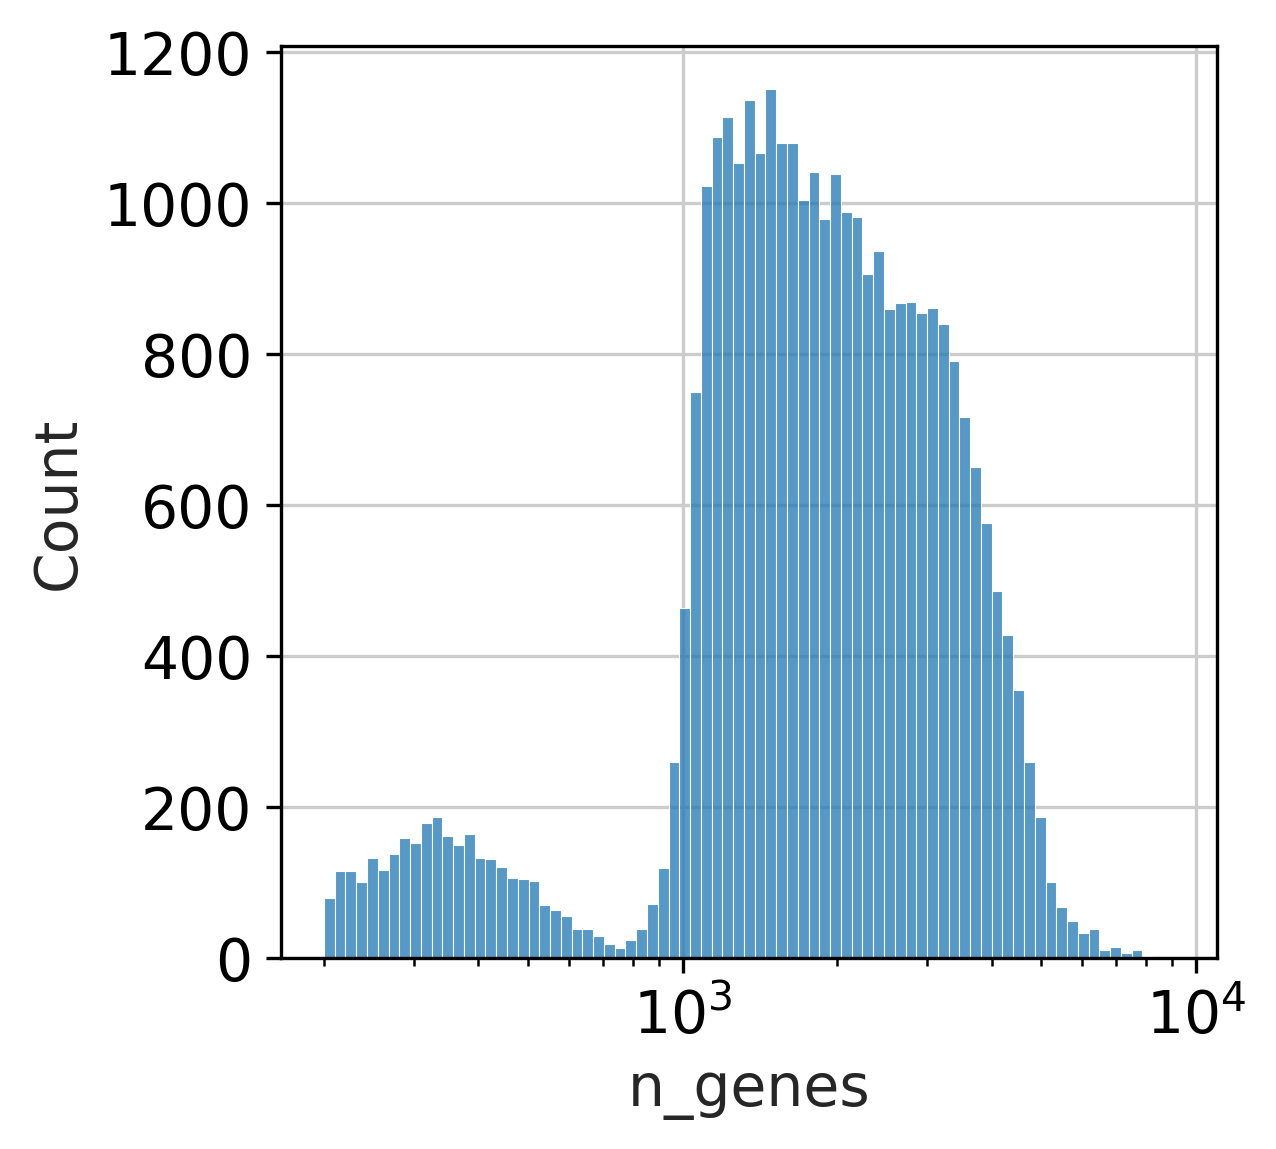

In [56]:
sns.histplot(adata.obs.n_genes, log_scale=True)
# вроде как можно сделать отсечку по 750

<Axes: xlabel='n_genes', ylabel='Count'>

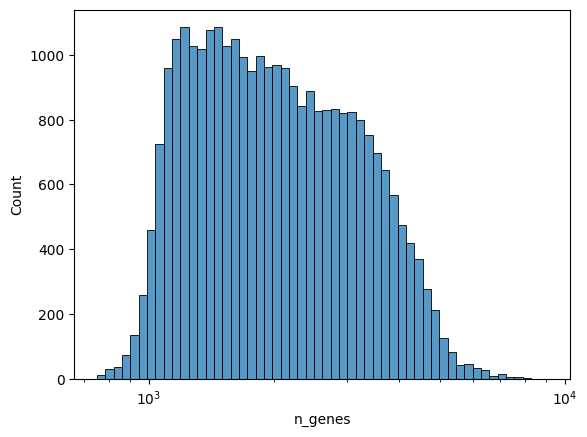

In [21]:
adata = adata[adata.obs.n_genes >= 750, :]
sns.histplot(adata.obs.n_genes, log_scale=True)

In [22]:
sc.pp.scrublet(adata, batch_key="donor_id")

<Axes: xlabel='doublet_score', ylabel='Count'>

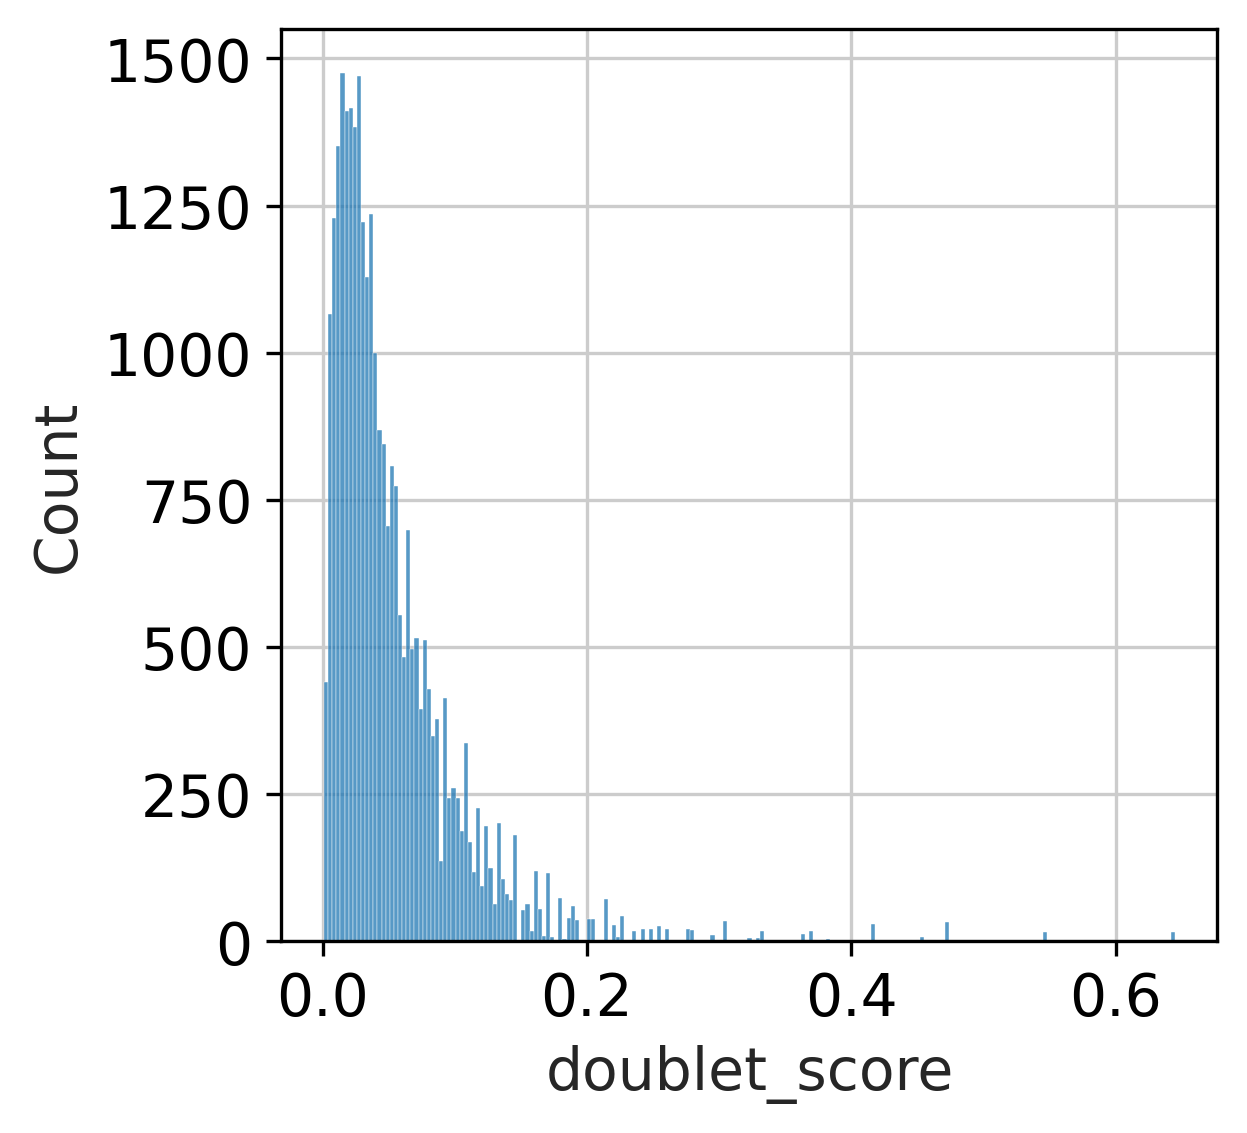

In [60]:
sns.histplot(adata.obs.doublet_score)
# кажется, 0.2 – норм (всего меньше 1к дуплетов на примерно 30к клеток)

In [23]:
adata = adata[adata.obs.doublet_score <= 0.2]

In [24]:
adata_counts = adata.copy()

In [25]:
adata = adata_counts.copy()

In [27]:
from scipy.sparse import csr_matrix
import hdf5plugin

adata.X = csr_matrix(adata.X)
adata.write_h5ad("temp.h5ad")

# RAM опять поджимает... Сохранился, чтобы ничего не упало

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, batch_key="donor_id", n_top_genes=3000)

adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

sc.pp.pca(adata, n_comps=20)

sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)

adata.X = csr_matrix(adata.X)
adata.write_h5ad("temp2.h5ad")

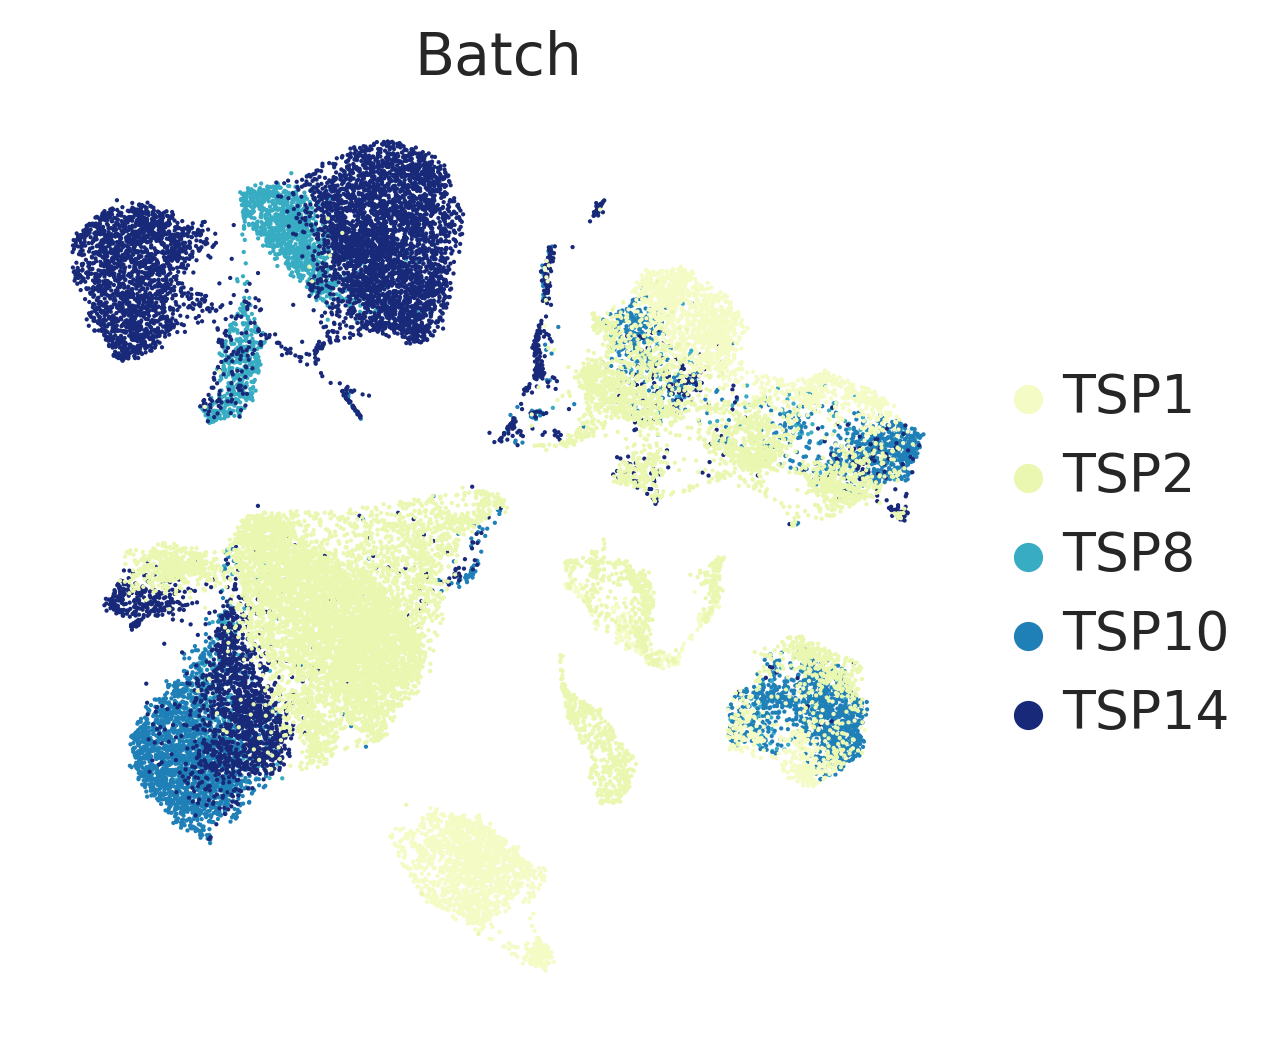

In [74]:
sc.pl.umap(adata, color="donor_id", frameon=False, title="Batch")
# Очень-очень плохо без батч-коррекции...

In [ ]:
sce.pp.harmony_integrate(adata, key="donor_id", max_iter_harmony=30)

sc.pp.neighbors(adata, use_rep="X_pca_harmony")
sc.tl.leiden(adata)
sc.tl.umap(adata)

# Ура, сошлось за пять итераций!

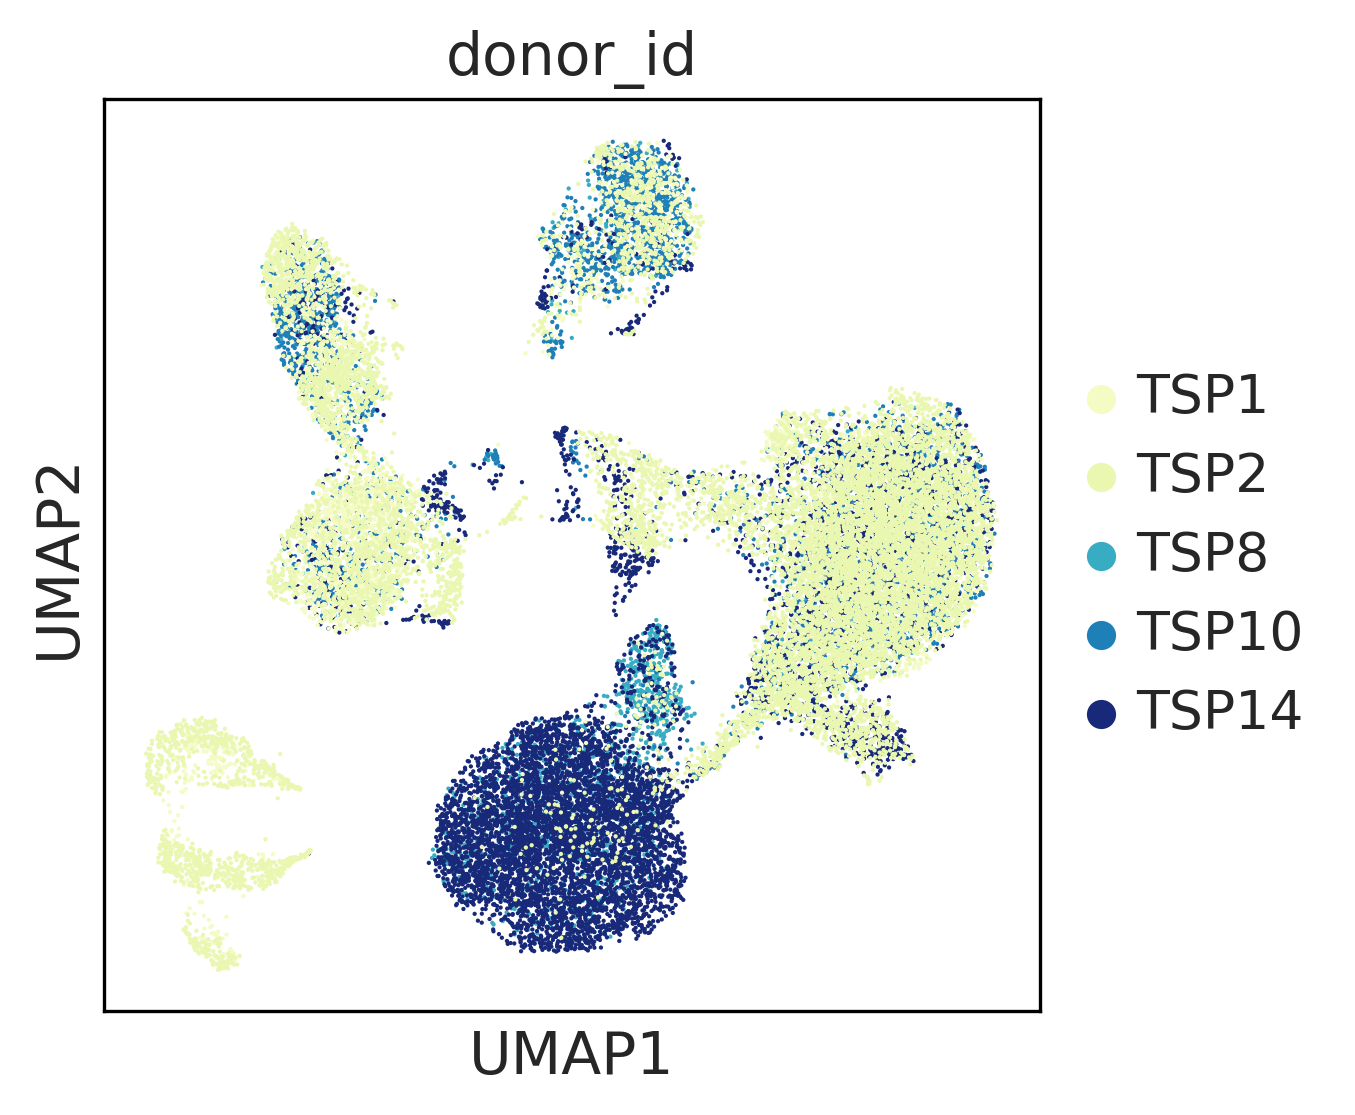

In [76]:
sc.pl.umap(adata, color="donor_id")
# У меня батчи перемешались, но TSP14 имеет какой-то странный кластер... (надеюсь, что это биологическая разница)

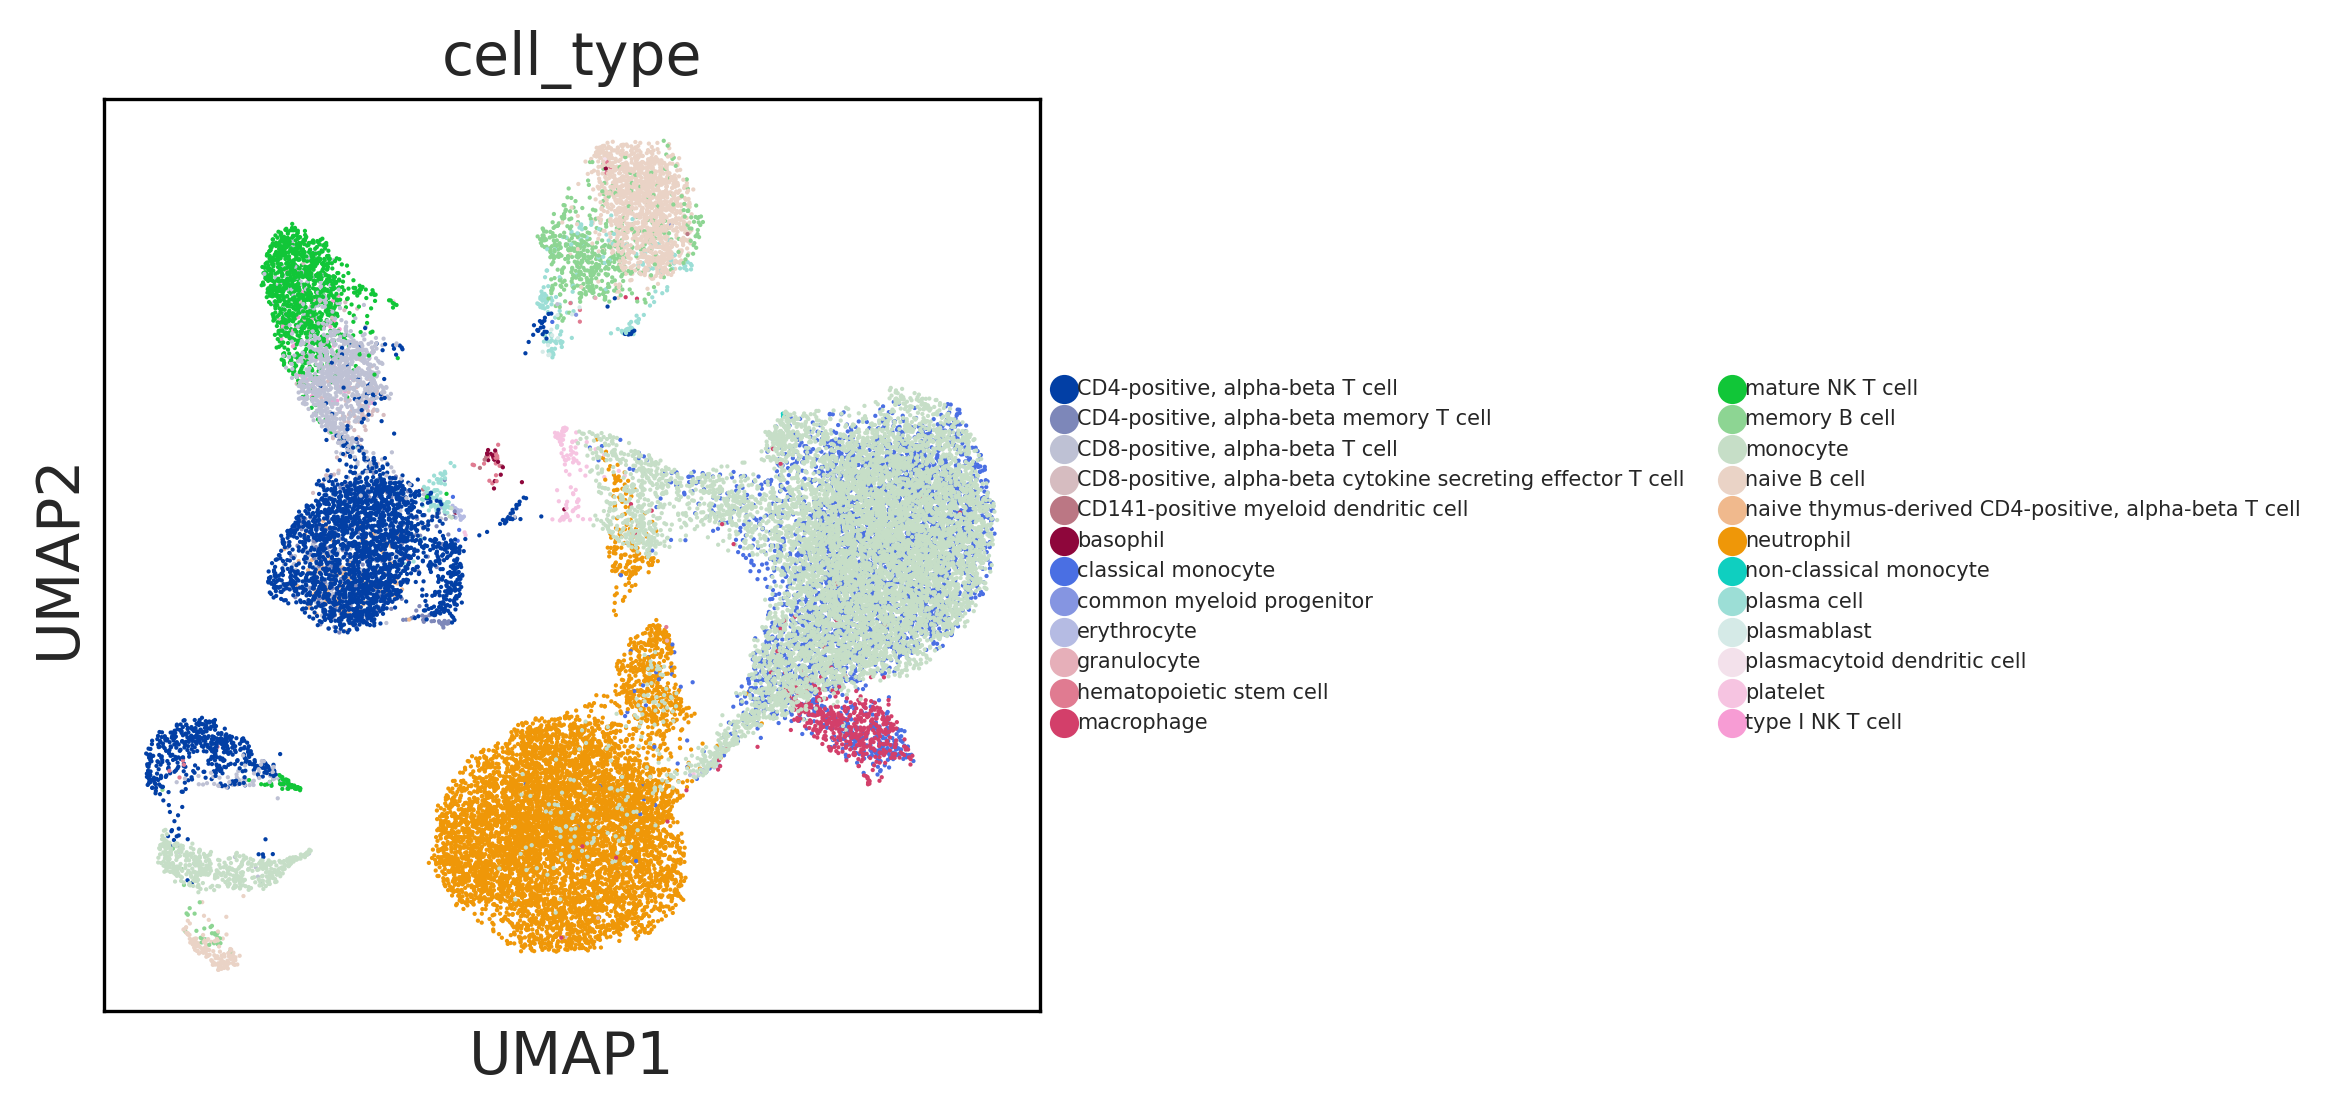

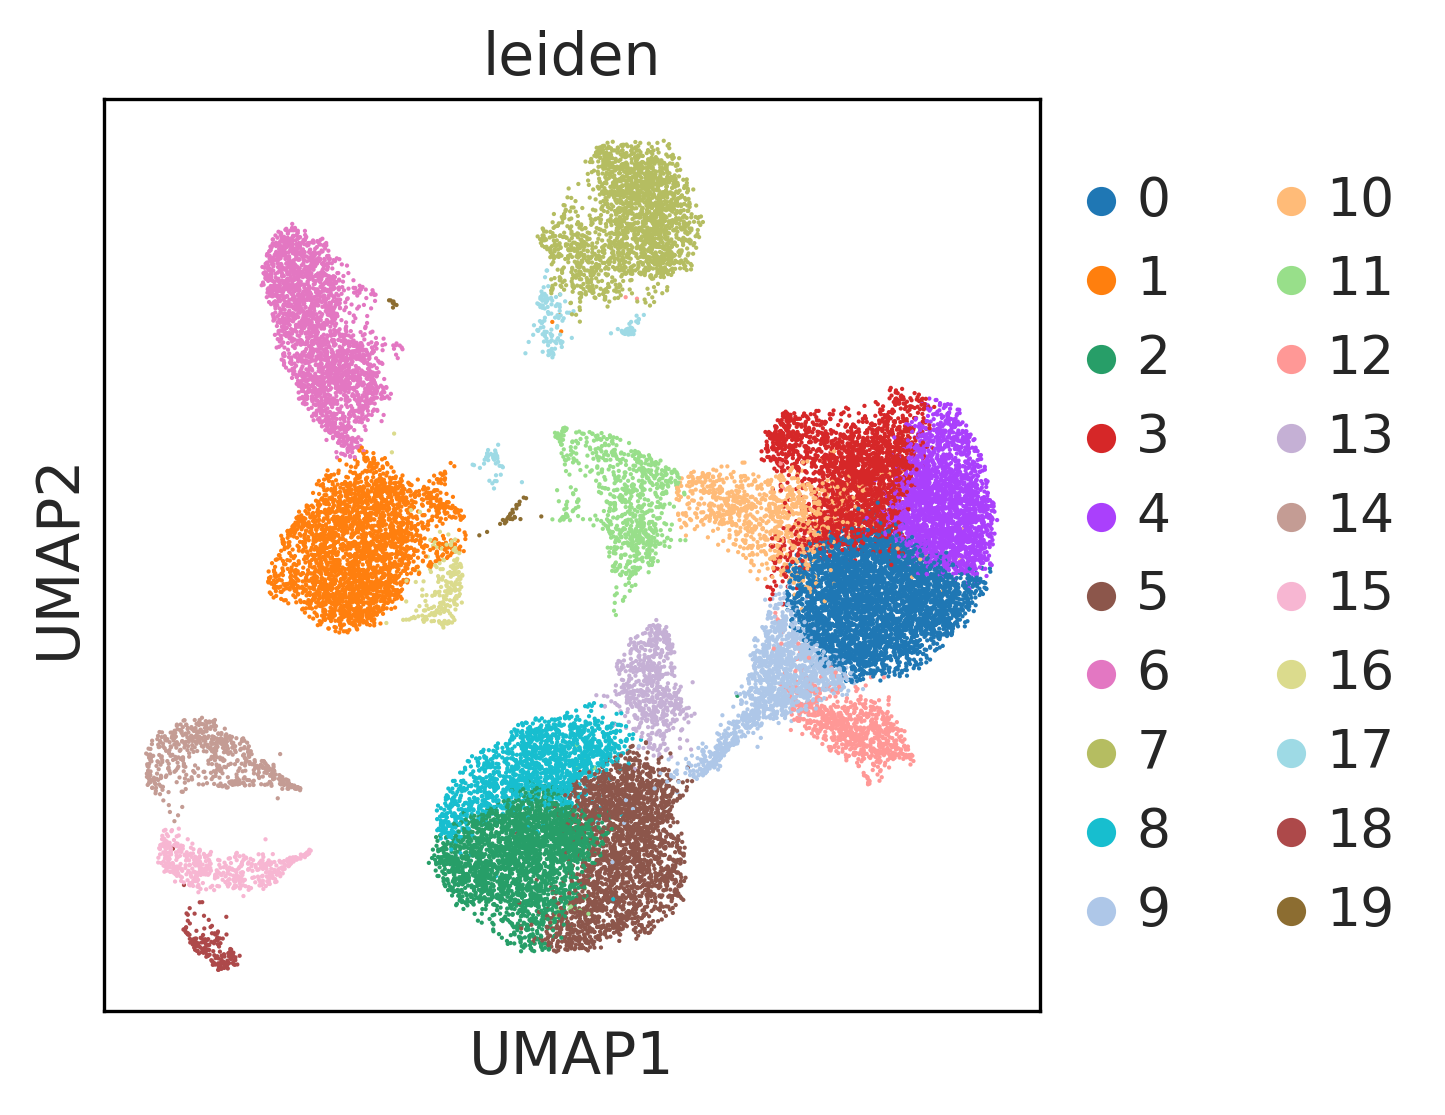

In [81]:
sc.pl.umap(adata, color="cell_type", legend_fontsize=5)
sc.pl.umap(adata, color="leiden")

Кластеризация скорее совпадает, чем нет, хотя есть много таких кластеров, которые неправильно объеденены (№№6,7) или разделены (№№ (0,3,4); (2,5,8))

In [82]:
# sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon") – в итоге не стал смотреть, для задания все равно не поможет

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:06:27)


In [36]:
import symphonypy as sp

 # у меня тоже кровь, так что в принципе могу себе позволить взять pbmc для трансферинга

In [37]:
adata_reference = sp.datasets.pbmcs_10x_reference()

In [39]:
adata_reference.X

<20571x2357 sparse matrix of type '<class 'numpy.float32'>'
	with 0 stored elements in Compressed Sparse Row format>

In [29]:
adata_query = adata.raw.to_adata()
adata_query

AnnData object with n_obs × n_vars = 28734 × 58482
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'mt', 'n_cells_by_counts'

In [44]:
adata_query.X.eliminate_zeros()

In [46]:
sp.tl.map_embedding(adata_query, adata_reference, key="donor_id")
sp.tl.per_cell_confidence(adata_query, adata_reference)
sp.tl.transfer_labels_kNN(adata_query, adata_reference, ref_labels=["cell_type"]) # ValueError: Input X contains NaN – ничего с этим не могу поделать

/usr/local/lib/python3.10/dist-packages/symphonypy/_utils.py:166: RuntimeWarning: invalid value encountered in divide
  X_cos = X / X.max(axis=1, keepdims=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values